In [5]:
import pandas as pd 
df = pd.read_csv("/Users/rodri/Downloads/amz_uk_price_prediction_dataset.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [6]:
#Create a crosstab between the product category and the isBestSeller status.

In [7]:
import pandas as pd

crosstab = pd.crosstab(df['category'], df['isBestSeller'])
crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [8]:
#Are there categories where being a best-seller is more prevalent?

In [9]:

total_count = df.groupby('category').size()
bestseller_count = df[df['isBestSeller']].groupby('category').size()


proportion_bestsellers = bestseller_count / total_count


proportion_df = proportion_bestsellers.reset_index(name='proportion_bestsellers')
sorted_df = proportion_df.sort_values(by='proportion_bestsellers', ascending=False)

sorted_df

,category,proportion_bestsellers
109,Grocery,0.058135
254,Smart Home Security & Lighting,0.057692
126,Health & Personal Care,0.057686
185,Mobile Phone Accessories,0.042471
229,Power & Hand Tools,0.035339
...,...,...
259,Snowboard Boots,NaN
281,Toy Advent Calendars,NaN
284,USB Gadgets,NaN
288,Vases,NaN


In [10]:
#Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

In [12]:
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _= chi2_contingency(crosstab)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [13]:
#Compute Cramér's V to understand the strength of association between best-seller status and category.

In [15]:
from scipy.stats.contingency import association

association(crosstab, method="cramer")

0.1222829439760564

In [16]:
#Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [17]:
top_seven_crosstab = crosstab.head()

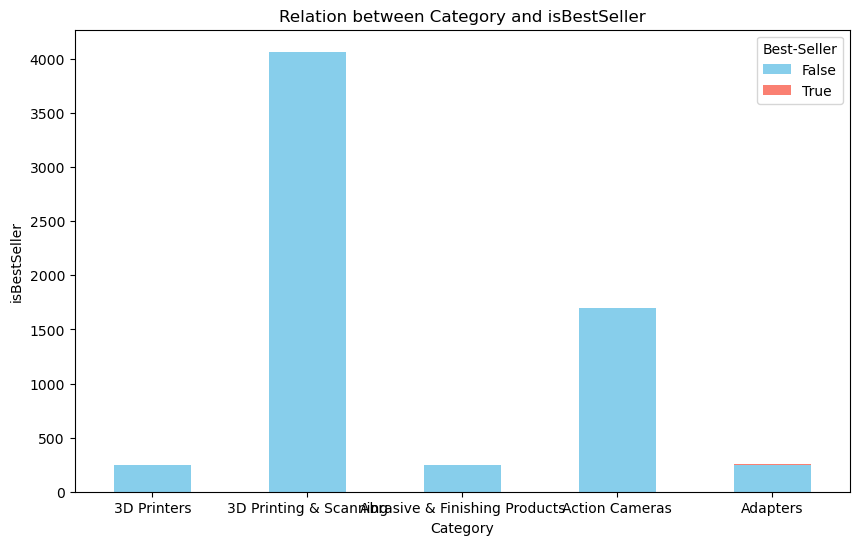

In [18]:
import matplotlib.pyplot as plt

top_seven_crosstab.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(10, 6))

plt.title('Relation between Category and isBestSeller')
plt.xlabel('Category')
plt.ylabel('isBestSeller')
plt.legend(title='Best-Seller')
plt.xticks(rotation=0)

plt.show()

In [ ]:
#Preliminary Step: Remove outliers in product prices.
#For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

In [32]:
import pandas as pd

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

Q1: 9.99, Q3: 45.99, IQR: 36.0


In [33]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Límite inferior: {lower_bound}, Límite superior: {upper_bound}")

Límite inferior: -44.01, Límite superior: 99.99000000000001


In [34]:
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print(f"Número de filas originales: {len(df)}")
print(f"Número de filas sin outliers: {len(df_no_outliers)}")

Número de filas originales: 2443651
Número de filas sin outliers: 2115963


In [ ]:
#Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
#Which product category tends to have the highest median price? Don't filter here by top categories.

In [36]:
import pandas as pd

category_counts = df['category'].value_counts()

top_20_categories = category_counts.head(20).index

df_top_20 = df[df['category'].isin(top_20_categories)]

df_top_20

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
19513,21072,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,763,7.99,False,900,Handmade Home & Kitchen Products
19514,21073,B0BSRFQYG8,Wax Melts 4 Bars | Build Your Own Box (Choose ...,3.9,117,6.49,True,800,Handmade Home & Kitchen Products
19515,21074,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1155,8.99,True,600,Handmade Home & Kitchen Products
19516,21075,B0BRYGV7PQ,Fresh Wax Melts - Laundry Type Wax Melts - Str...,4.5,56,4.99,True,500,Handmade Home & Kitchen Products
19517,21076,B0B1JHB28R,Manta Makes Work Leaving Gifts | I Used to Wor...,4.7,261,9.95,True,400,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


/var/folders/cy/4jtvxlld09qd1srrzgj8fyy00000gp/T/ipykernel_42297/2638308927.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='category', y='price', data=df_top_20, palette="muted")


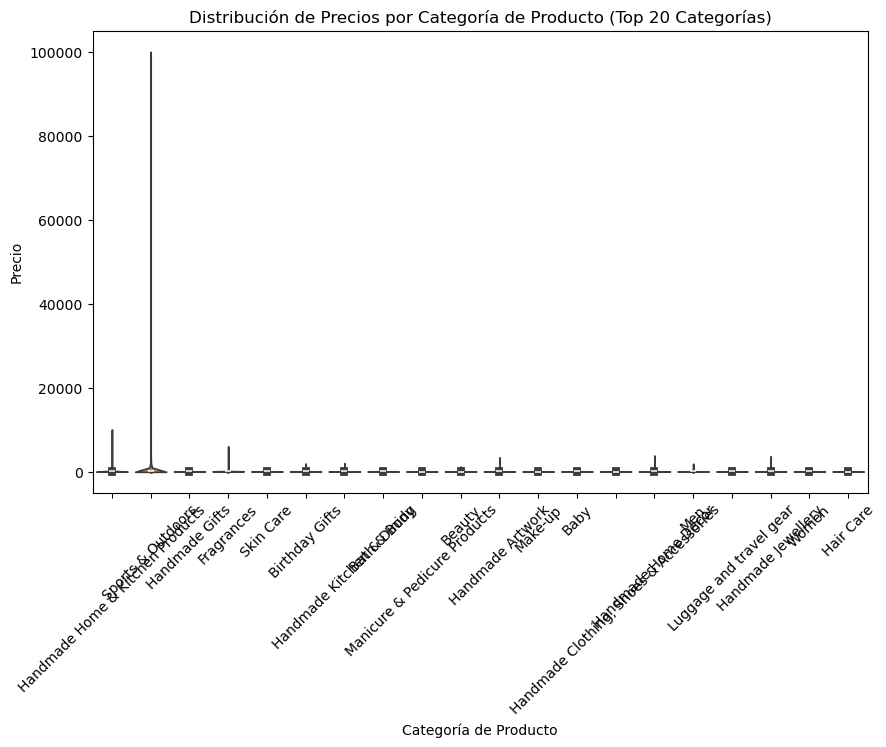

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.violinplot(x='category', y='price', data=df_top_20, palette="muted")

plt.title('Distribución de Precios por Categoría de Producto (Top 20 Categorías)')
plt.xlabel('Categoría de Producto')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()

In [38]:
median_prices = df.groupby('category')['price'].median()

highest_median_category = median_prices.idxmax()
highest_median_price = median_prices.max()

print(f"La categoría con el precio mediano más alto es '{highest_median_category}' con un precio de {highest_median_price}")

La categoría con el precio mediano más alto es 'Laptops' con un precio de 1042.725


In [ ]:
#Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
#Which product category commands the highest average price? Don't filter here by top categories.


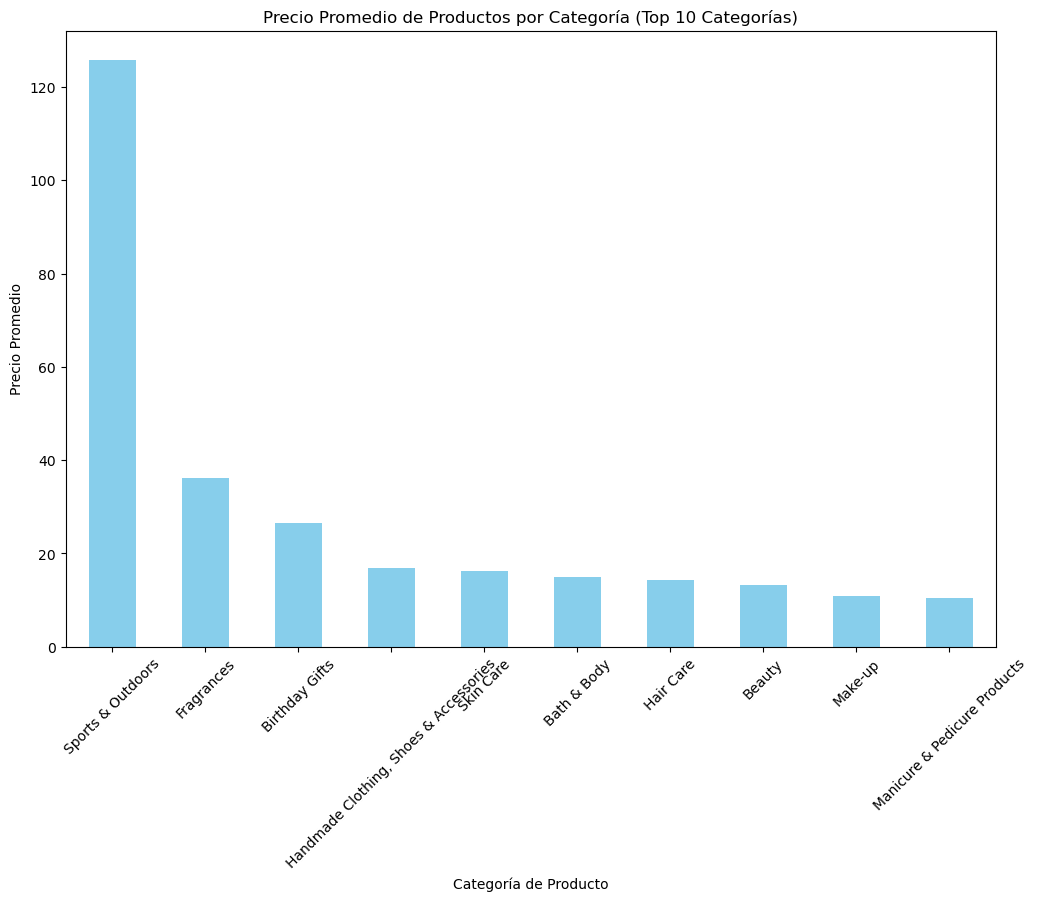

La categoría con el precio promedio más alto es 'Laptops' con un precio de 1087.987826986755


In [40]:
import pandas as pd
import matplotlib.pyplot as plt

category_counts = df['category'].value_counts()
top_10_categories = category_counts.head(10).index
df_top_10 = df[df['category'].isin(top_10_categories)]

average_prices_top_10 = df_top_10.groupby('category')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
average_prices_top_10.plot(kind='bar', color='skyblue')

plt.title('Precio Promedio de Productos por Categoría (Top 10 Categorías)')
plt.xlabel('Categoría de Producto')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.show()

average_prices_all_categories = df.groupby('category')['price'].mean()

highest_average_category = average_prices_all_categories.idxmax()
highest_average_price = average_prices_all_categories.max()

print(f"La categoría con el precio promedio más alto es '{highest_average_category}' con un precio de {highest_average_price}")

In [ ]:
#Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
#Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

/var/folders/cy/4jtvxlld09qd1srrzgj8fyy00000gp/T/ipykernel_42297/1311284727.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='stars', data=df_top_10, palette="muted")


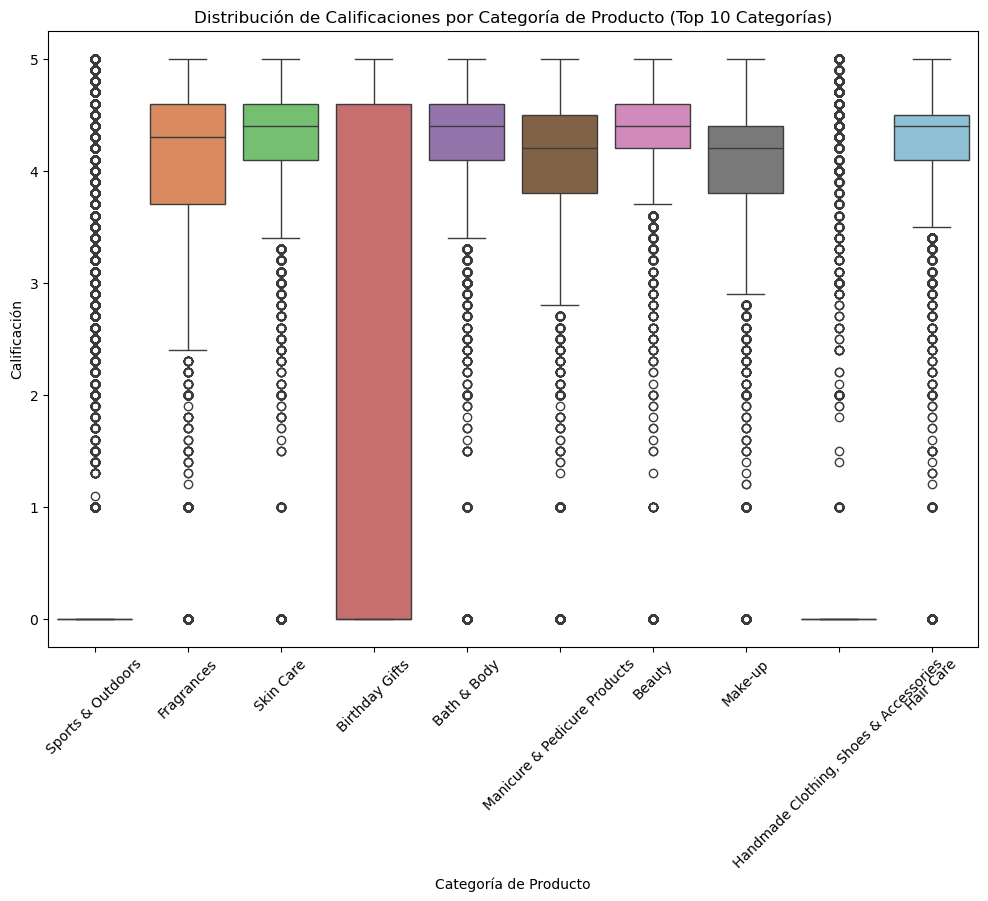

La categoría con la calificación mediana más alta es 'Computer Memory' con una calificación de 4.7


In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las 10 principales categorías por conteo
category_counts = df['category'].value_counts()
top_10_categories = category_counts.head(10).index
df_top_10 = df[df['category'].isin(top_10_categories)]

# Crear el diagrama de caja para las 10 principales categorías
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='stars', data=df_top_10, palette="muted")

# Añadir título y etiquetas
plt.title('Distribución de Calificaciones por Categoría de Producto (Top 10 Categorías)')
plt.xlabel('Categoría de Producto')
plt.ylabel('Calificación')
plt.xticks(rotation=45)
plt.show()

# Calcular la calificación mediana para cada categoría
median_ratings = df.groupby('category')['stars'].median()

# Identificar la categoría con la calificación mediana más alta
highest_median_category = median_ratings.idxmax()
highest_median_rating = median_ratings.max()

print(f"La categoría con la calificación mediana más alta es '{highest_median_category}' con una calificación de {highest_median_rating}")

In [ ]:
#Calculate the correlation coefficient between price and stars.
#Is there a significant correlation between product price and its rating?


In [46]:
import pandas as pd


df = df.dropna(subset=['price', 'stars'])

correlation = df['price'].corr(df['stars'])

print(f"El coeficiente de correlación entre precio y calificación es: {correlation}")

if correlation > 0:
    print("Hay una correlación positiva entre el precio del producto y su calificación.")
elif correlation < 0:
    print("Hay una correlación negativa entre el precio del producto y su calificación.")
else:
    print("No hay una correlación significativa entre el precio del producto y su calificación.")

El coeficiente de correlación entre precio y calificación es: -0.12490673262148681
Hay una correlación negativa entre el precio del producto y su calificación.


In [ ]:
# Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?

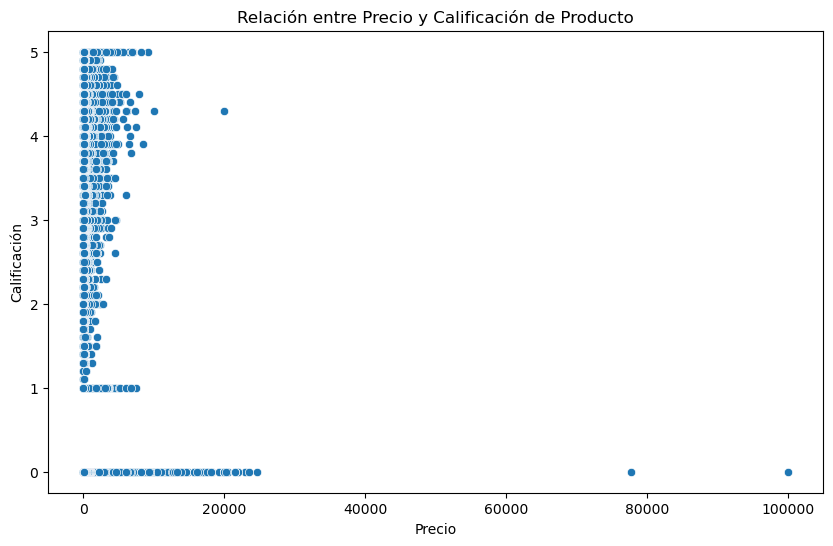

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = df.dropna(subset=['price', 'stars'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='stars', data=df)


plt.title('Relación entre Precio y Calificación de Producto')
plt.xlabel('Precio')
plt.ylabel('Calificación')
plt.show()

In [ ]:
#Use a correlation heatmap to visualize correlations between all numerical variables.

In [51]:
import numpy as np
potencial_numerical_columns = df.select_dtypes(include=[np.number])

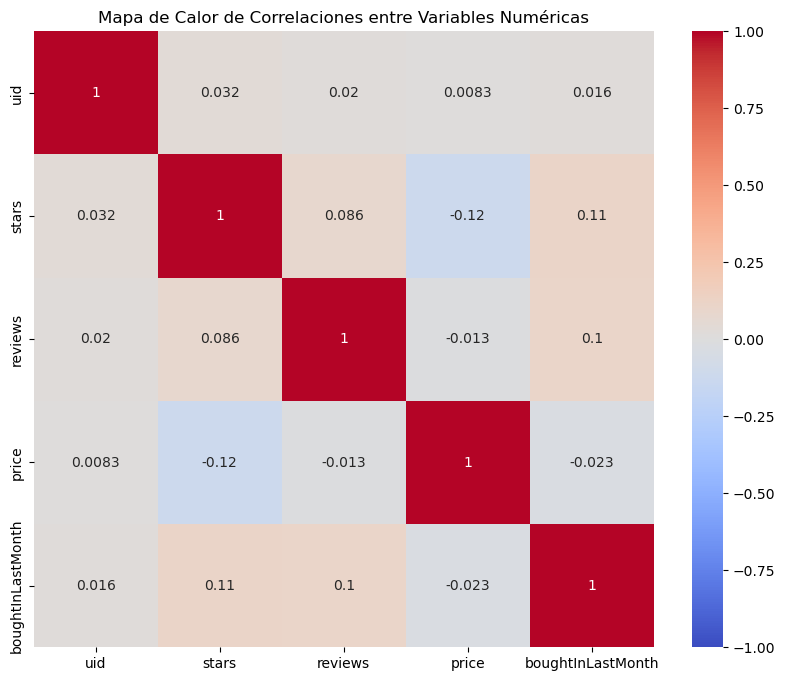

In [52]:

correlation_matrix = potencial_numerical_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)


plt.title('Mapa de Calor de Correlaciones entre Variables Numéricas')
plt.show()

In [ ]:
#Examine if product prices typically follow a normal distribution using a QQ plot.


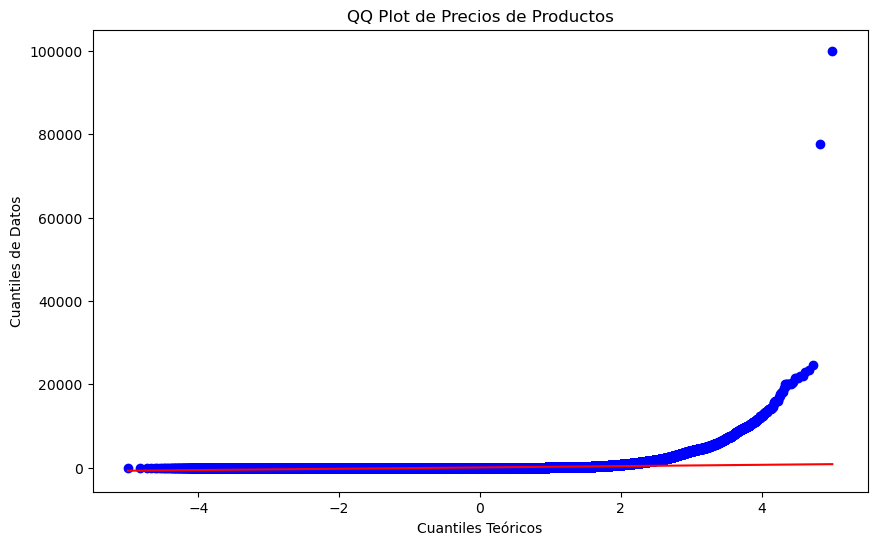

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Eliminar filas con valores faltantes en la columna 'price'
df = df.dropna(subset=['price'])

# Crear el QQ plot para la columna 'price'
plt.figure(figsize=(10, 6))
stats.probplot(df['price'], dist="norm", plot=plt)

# Añadir título y etiquetas
plt.title('QQ Plot de Precios de Productos')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de Datos')
plt.show()